# **ML Data Cleaning and Feature Selection**

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



There is an example notebook for assignment one here

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks to an external site.

Imputation Methods for Missing Data
https://www.youtube.com/watch?v=fYhr8eF1uboLinks to an external site.

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-pythonLinks to an external site.




Scoring Rubric

Are my answers supported with data? (20 Points)

Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)



Public dataset (5 Points)

Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.



What code is yours and what have you adapted? (5 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.



Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.



Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.



Answers to listed questions (45 Points)



* Which independent variables are useful to predict a target (dependent variable)?

* Which independent variable have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013)Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# **Answers Start from here --->**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
# loading csv file onto colab

from google.colab import files


uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['imdb_top_1000.csv']))
print(data)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II  

In [5]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


 1. What are the data types?
- **Poster_Link:** Categorical data (text/URL representing the poster link).
- **Series_Title:** Categorical data (text representing the title of the series/movie).
- **Released_Year:** Numeric data (representing the release year).
- **Certificate:** Categorical data (text representing the certification).
- **Runtime:** Categorical data (text representing the duration).
- **Genre:** Categorical data (text representing the genre).
- **IMDB_Rating:** Numeric data (representing the IMDb rating).
- **Overview:** Categorical data (text providing a brief overview or description).
- **Meta_score:** Numeric data (representing the metascore).
- **Director:** Categorical data (text representing the director's name).
- **Star1, Star2, Star3, Star4:** Categorical data (text representing the names of stars).
- **No_of_Votes:** Numeric data (representing the number of votes).
- **Gross:** Numeric data (representing the gross earnings).


In [6]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [7]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [8]:
columns_to_drop = ['Poster_Link','Series_Title', 'Overview', 'Director', 'Star1', 'Star2','Star3', 'Star4']
# columns_to_drop = ['Series_Title', 'Director', 'Star1', 'Star2']
data = data.drop(columns=columns_to_drop)
data.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,2343110,"28,341,469"
1,1972,A,175 min,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,1974,A,202 min,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,1957,U,96 min,"Crime, Drama",9.0,96.0,689845,"4,360,000"


Dropped 4 columns so far:  
**Poster_Link, Overview, Star3 and Star4.**

Numerical Data Columns are :  
**Year, IMDB_Rating, Meta_Score and No of Votes**

Target Variable is :
**Gross**



In [9]:
#Check for all missing values
data.isna().sum()

Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
No_of_Votes        0
Gross            169
dtype: int64

In [10]:
data['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

2. **The dataset has missing values in 4 columns, Certificate, Meta_Score and Gross**

I will now be imputating missing values using Mean/Mode Replacement

**Considering that movie certificates may not always be strictly enforced, and there can be variations in age restrictions across regions, I've decided to remove the 'Certificate' column from the dataset. This is because the certificate rating alone may not accurately reflect whether children or teenagers have watched a particular movie. The removal of this column will help streamline the dataset and avoid potential inaccuracies associated with certificate-based age restrictions.**

In [11]:
data = data.drop('Certificate', axis=1)
data.head()

,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,142 min,Drama,9.3,80.0,2343110,"28,341,469"
1,1972,175 min,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,2008,152 min,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,1974,202 min,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,1957,96 min,"Crime, Drama",9.0,96.0,689845,"4,360,000"


In [12]:
#Lets work with MetaScore, First lets see the occuring values and find their mean
data['Meta_score'].value_counts()

76.0    32
84.0    29
90.0    29
80.0    27
73.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: Meta_score, Length: 63, dtype: int64

In [13]:
data['Meta_score'].mean()

77.97153024911032

In [14]:
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)

In [15]:
#Now to full the impute values for Gross column with mean value
data.isna().sum()
data['Gross'] = data['Gross'].str.replace(',','').astype(float)
print(data['Gross'].dtype)

float64


In [16]:
data['Gross'].mean()

68034750.87364621

In [17]:
# filling NaN values with Gross mean value
data['Gross'] = data['Gross'].fillna(data['Gross'].mean())

After replacing all the missing values, the table has no null values

3. **To find the likely distributions of the numerical variables, I will plot QQ plots for each of them**

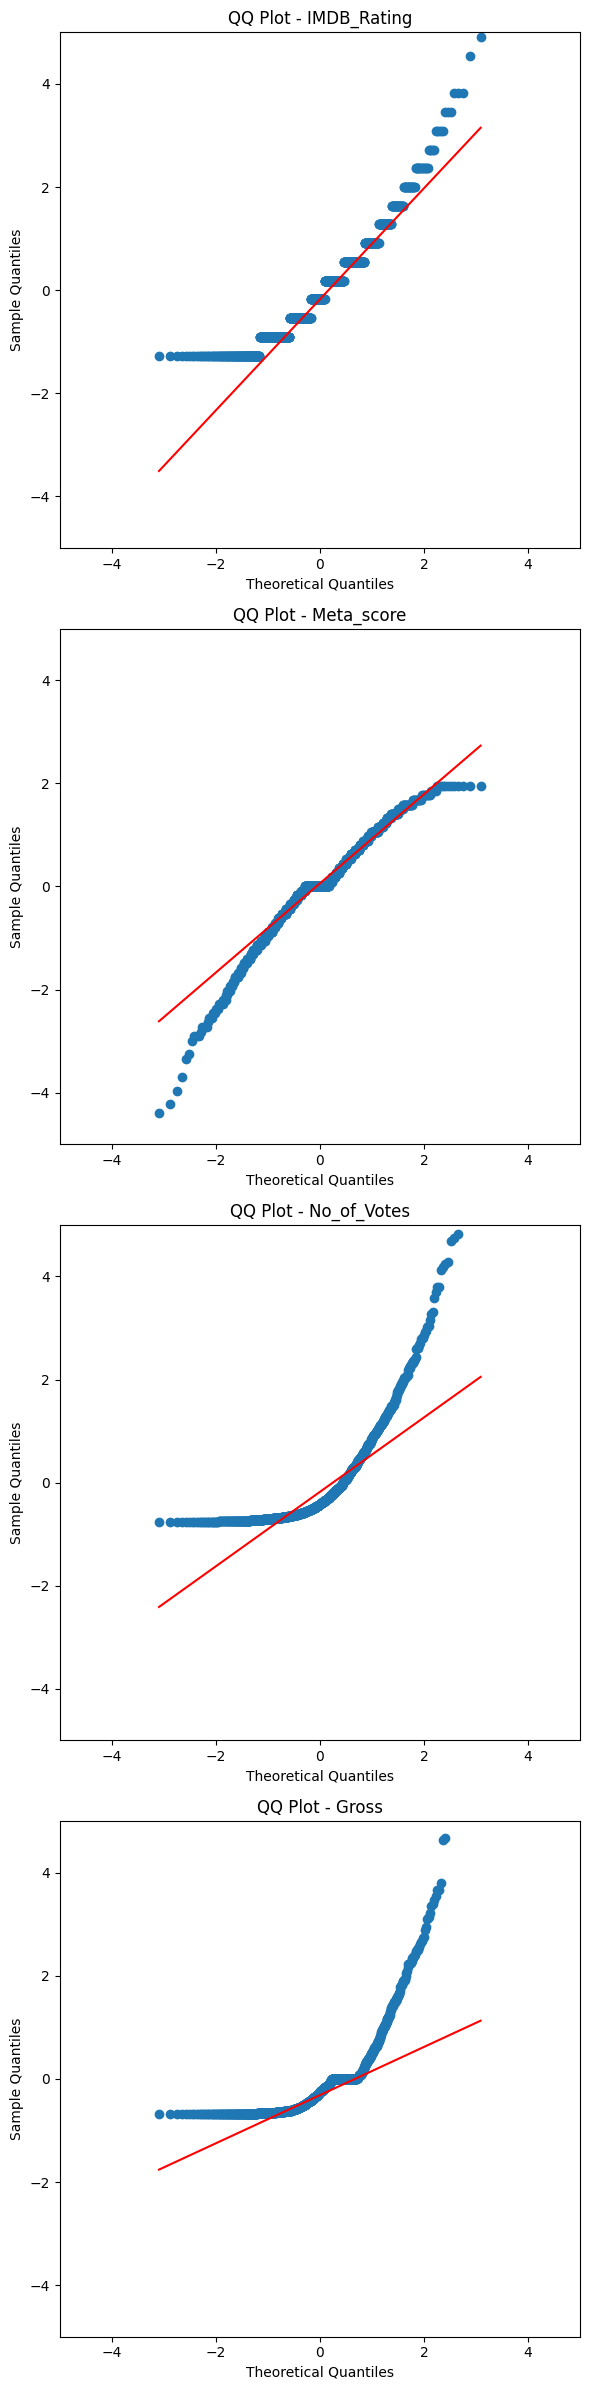

In [18]:
#Plotting QQ plots for each of the numerical columns
import statsmodels.api as sm

# Extracting the specified columns
columns_to_plot = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
selected_data = data[columns_to_plot]

# Function to plot QQ plots for each column
def plot_qq_plots(data):
    fig, axes = plt.subplots(nrows=len(data.columns), figsize=(6, 6 * len(data.columns)))

    for i, col in enumerate(data.columns):
        sm.qqplot(data[col], line='q', ax=axes[i], fit=True)
        axes[i].set_title(f'QQ Plot - {col}')

        # Customize y-axis and x-axis limits for a broader range
        axes[i].set_ylim(-5, 5)  # Set y-axis limits
        axes[i].set_xlim(-5, 5)

    plt.tight_layout()
    plt.show()

# Plot QQ plots
plot_qq_plots(selected_data)

1. **IMDB rating:** The graph indicates right-skewed data.
2. **Meta_Score:** The distribution appears to be normal.
3. **No_Of_Votes:** The graph suggests right-skewed data.
4. **Gross:** The distribution of Gross appears to be right-skewed.


To Visualize Categorical variables such as Genre and Certificate, I will be converting them to binary format.

First with Genre. I will consider only 2 genres, Fiction and NonFiction for my purpose.

Fiction: Drama, Comedy, Crime, Adventure, Action, Thriller, Romance, Mystery, Animation, Sci-Fi, Fantasy, Horror, Western, Film-Noir, Sport.

Non-Fiction: Biography, History, Family, War, Music, Musical.

This should make my classification of genre easier.

I will only take the first genre string value into consideration for this, as based on observation, the first genre is the primary genre of the movie.

In [19]:
# Define a function to classify genres
def classify_genre(genre):
    fiction_genres = ['Drama', 'Comedy', 'Crime', 'Adventure', 'Action', 'Thriller', 'Romance', 'Mystery', 'Animation', 'Sci-Fi', 'Fantasy', 'Horror', 'Western', 'Film-Noir', 'Sport']
    non_fiction_genres = ['Biography', 'History', 'Family', 'War', 'Music', 'Musical']

    first_genre = genre.split(', ')[0]  # Extract the first genre from the list

    if first_genre in fiction_genres:
        return 1  # Fiction
    elif first_genre in non_fiction_genres:
        return 0  # Non-Fiction
    else:
        return -1  # Unknown or other

# Apply the classification function to create the 'isFiction' column in the original DataFrame 'data'
data['isFiction'] = data['Genre'].apply(classify_genre)

# Display the modified DataFrame (data)
data.head(20)

,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction
0,1994,142 min,Drama,9.3,80.0,2343110,2.834147e+07,1
1,1972,175 min,"Crime, Drama",9.2,100.0,1620367,1.349664e+08,1
2,2008,152 min,"Action, Crime, Drama",9.0,84.0,2303232,5.348584e+08,1
3,1974,202 min,"Crime, Drama",9.0,90.0,1129952,5.730000e+07,1
4,1957,96 min,"Crime, Drama",9.0,96.0,689845,4.360000e+06,1
5,2003,201 min,"Action, Adventure, Drama",8.9,94.0,1642758,3.778459e+08,1
6,1994,154 min,"Crime, Drama",8.9,94.0,1826188,1.079288e+08,1
7,1993,195 min,"Biography, Drama, History",8.9,94.0,1213505,9.689882e+07,0
8,2010,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,2067042,2.925762e+08,1
9,1999,139 min,Drama,8.8,66.0,1854740,3.703010e+07,1


In [20]:
data.head(10)

,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction
0,1994,142 min,Drama,9.3,80.0,2343110,28341469.0,1
1,1972,175 min,"Crime, Drama",9.2,100.0,1620367,134966411.0,1
2,2008,152 min,"Action, Crime, Drama",9.0,84.0,2303232,534858444.0,1
3,1974,202 min,"Crime, Drama",9.0,90.0,1129952,57300000.0,1
4,1957,96 min,"Crime, Drama",9.0,96.0,689845,4360000.0,1
5,2003,201 min,"Action, Adventure, Drama",8.9,94.0,1642758,377845905.0,1
6,1994,154 min,"Crime, Drama",8.9,94.0,1826188,107928762.0,1
7,1993,195 min,"Biography, Drama, History",8.9,94.0,1213505,96898818.0,0
8,2010,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,2067042,292576195.0,1
9,1999,139 min,Drama,8.8,66.0,1854740,37030102.0,1


In [21]:
#Dropping Genre column
data = data.drop('Genre', axis=1)

In [22]:
data.tail(60)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction
940,2004,106 min,7.6,67.0,198677,5.168061e+07,0
941,2002,135 min,7.6,68.0,169708,1.306084e+07,1
942,2004,113 min,7.6,30.0,451479,5.793869e+07,1
943,2002,113 min,7.6,73.0,376853,4.506492e+07,1
944,2000,114 min,7.6,81.0,169091,6.803475e+07,1
945,2001,110 min,7.6,76.0,266842,5.236401e+07,1
946,2001,106 min,7.6,88.0,115827,1.362233e+07,1
947,2001,152 min,7.6,64.0,658185,3.175756e+08,1
948,2001,101 min,7.6,74.0,337651,9.652269e+07,1
949,2001,124 min,7.6,52.0,240714,5.299078e+07,0


Seems like there is one row with a wrong value for year, row 966, I will fill it with the year based on movie released year.

In [23]:
data.at[966, 'Released_Year'] = ''


In [24]:
data['Released_Year'].dtype
column_name = 'Released_Year'

# Convert the column to numeric, coercing errors to replace non-convertible values with NaN
data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

# Replace NaN values with 0
data[column_name] = data[column_name].fillna(0)

# Convert the column to int
data[column_name] = data[column_name].astype(int)

# Print the result
data.tail(60)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction
940,2004,106 min,7.6,67.0,198677,5.168061e+07,0
941,2002,135 min,7.6,68.0,169708,1.306084e+07,1
942,2004,113 min,7.6,30.0,451479,5.793869e+07,1
943,2002,113 min,7.6,73.0,376853,4.506492e+07,1
944,2000,114 min,7.6,81.0,169091,6.803475e+07,1
945,2001,110 min,7.6,76.0,266842,5.236401e+07,1
946,2001,106 min,7.6,88.0,115827,1.362233e+07,1
947,2001,152 min,7.6,64.0,658185,3.175756e+08,1
948,2001,101 min,7.6,74.0,337651,9.652269e+07,1
949,2001,124 min,7.6,52.0,240714,5.299078e+07,0


In [25]:
data.at[966, 'Released_Year'] = 1995
print(data.iloc[966])

Released_Year           1995
Runtime              140 min
IMDB_Rating              7.6
Meta_score              77.0
No_of_Votes           269197
Gross            173837933.0
isFiction                  1
Name: 966, dtype: object


In [26]:
data.head()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction
0,1994,142 min,9.3,80.0,2343110,28341469.0,1
1,1972,175 min,9.2,100.0,1620367,134966411.0,1
2,2008,152 min,9.0,84.0,2303232,534858444.0,1
3,1974,202 min,9.0,90.0,1129952,57300000.0,1
4,1957,96 min,9.0,96.0,689845,4360000.0,1


In [27]:
data['isFiction'].value_counts()

1    910
0     90
Name: isFiction, dtype: int64

In [28]:
#removing text from runtime column and converting it into int format
data['Runtime'] = data['Runtime'].str.replace('min', '').astype(int)
data = data.rename(columns={'Runtime': 'Runtime_in_mins'})
data.head()

,Released_Year,Runtime_in_mins,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction
0,1994,142,9.3,80.0,2343110,28341469.0,1
1,1972,175,9.2,100.0,1620367,134966411.0,1
2,2008,152,9.0,84.0,2303232,534858444.0,1
3,1974,202,9.0,90.0,1129952,57300000.0,1
4,1957,96,9.0,96.0,689845,4360000.0,1


In [29]:
# Calculate the minimum and maximum values of the 'Runtime_in_mins' column
min_runtime = data['Runtime_in_mins'].min()
max_runtime = data['Runtime_in_mins'].max()

# Calculate the range
range_runtime = max_runtime - min_runtime

print(f"Minimum Runtime: {min_runtime} mins")
print(f"Maximum Runtime: {max_runtime} mins")
print(f"Range of Runtime: {range_runtime} mins")

Minimum Runtime: 45 mins
Maximum Runtime: 321 mins
Range of Runtime: 276 mins


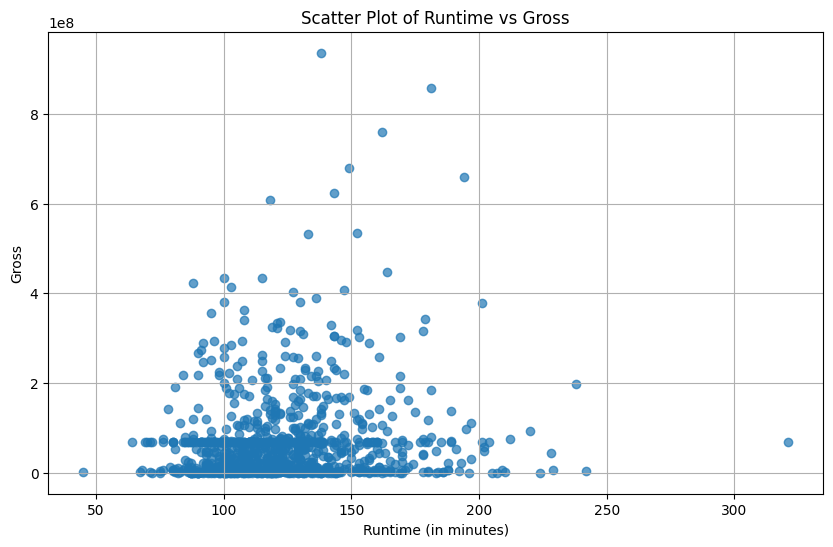

In [30]:
# Plotting a line graph between runtime and gross
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Runtime_in_mins'], data['Gross'], alpha=0.7)
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Gross')
plt.title('Scatter Plot of Runtime vs Gross')
plt.grid(True)
plt.show()

Based on the scatter plot, its hard to figure out any relation between gross value and runtime and since the values of runtime can vary between movies. I can also observe that before 90 mins and after 150 mins, the number of dots have decreased quite a lot ,so, I will categorise them into 3 parts. ( in mins)
### Short movie : Run time < 90
### Average movie: Run time > 90 && < 150
### Long movie: Run time > 150

In [31]:
# Create the new columns with default values of 0
data['isShortRuntime'] = 0
data['isAvgRuntime'] = 0
data['isLongRuntime'] = 0

# Set values based on conditions
data.loc[data['Runtime_in_mins'] < 90, 'isShortRuntime'] = 1
data.loc[(data['Runtime_in_mins'] >= 90) & (data['Runtime_in_mins'] <= 150), 'isAvgRuntime'] = 1
data.loc[data['Runtime_in_mins'] > 150, 'isLongRuntime'] = 1

# Display the modified DataFrame
data.head()

,Released_Year,Runtime_in_mins,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction,isShortRuntime,isAvgRuntime,isLongRuntime
0,1994,142,9.3,80.0,2343110,28341469.0,1,0,1,0
1,1972,175,9.2,100.0,1620367,134966411.0,1,0,0,1
2,2008,152,9.0,84.0,2303232,534858444.0,1,0,0,1
3,1974,202,9.0,90.0,1129952,57300000.0,1,0,0,1
4,1957,96,9.0,96.0,689845,4360000.0,1,0,1,0


In [32]:
#dropping Runtime_in_mins column
data = data.drop('Runtime_in_mins', axis=1)
data.head()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction,isShortRuntime,isAvgRuntime,isLongRuntime
0,1994,9.3,80.0,2343110,28341469.0,1,0,1,0
1,1972,9.2,100.0,1620367,134966411.0,1,0,0,1
2,2008,9.0,84.0,2303232,534858444.0,1,0,0,1
3,1974,9.0,90.0,1129952,57300000.0,1,0,0,1
4,1957,9.0,96.0,689845,4360000.0,1,0,1,0



### Since, IMDB rating is in the range of 1 - 10 and rating scale is usually constant. I will normalize MetaScore, No of Votes and Gross to a 1 -10 scale as well. This will help visualize my data better

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object with the custom range (1 to 10)
custom_scaler = MinMaxScaler(feature_range=(1, 10))

# Normalize the specified columns in the original 'data' DataFrame
columns_to_normalize = ['No_of_Votes', 'Gross', 'Meta_score']
data[columns_to_normalize] = custom_scaler.fit_transform(data[columns_to_normalize])
data.head()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction,isShortRuntime,isAvgRuntime,isLongRuntime
0,1994,9.3,7.50,10.000000,1.272309,1,0,1,0
1,1972,9.2,10.00,7.193863,2.296826,1,0,0,1
2,2008,9.0,8.00,9.845169,6.139228,1,0,0,1
3,1974,9.0,8.75,5.289768,1.550560,1,0,0,1
4,1957,9.0,9.50,3.580999,1.041881,1,0,1,0


Now the data is all in the same range, and easier to compare.

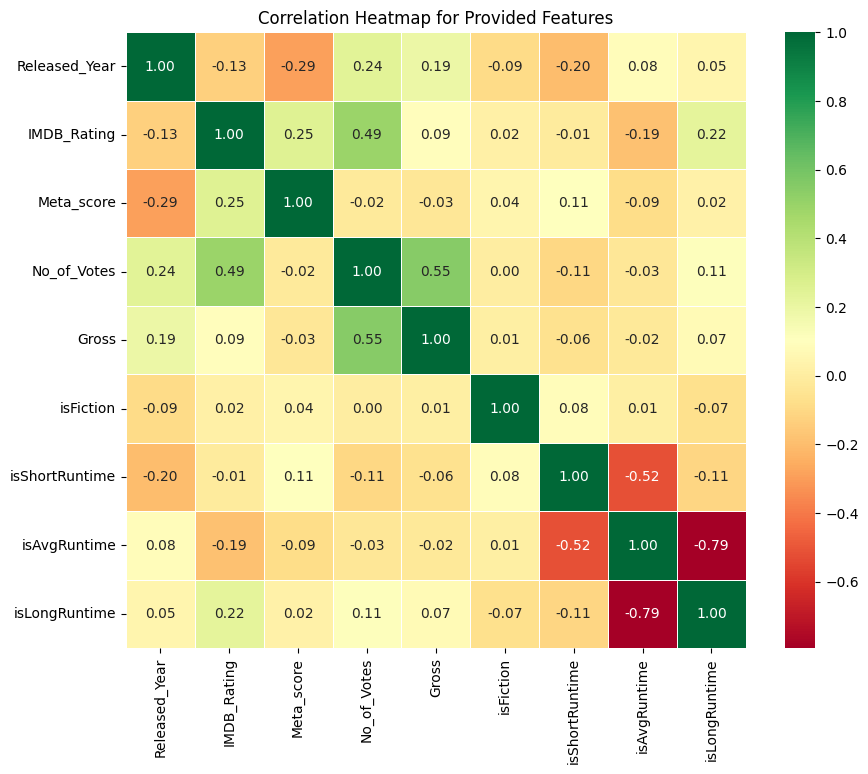

In [34]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Provided Features')
plt.show()

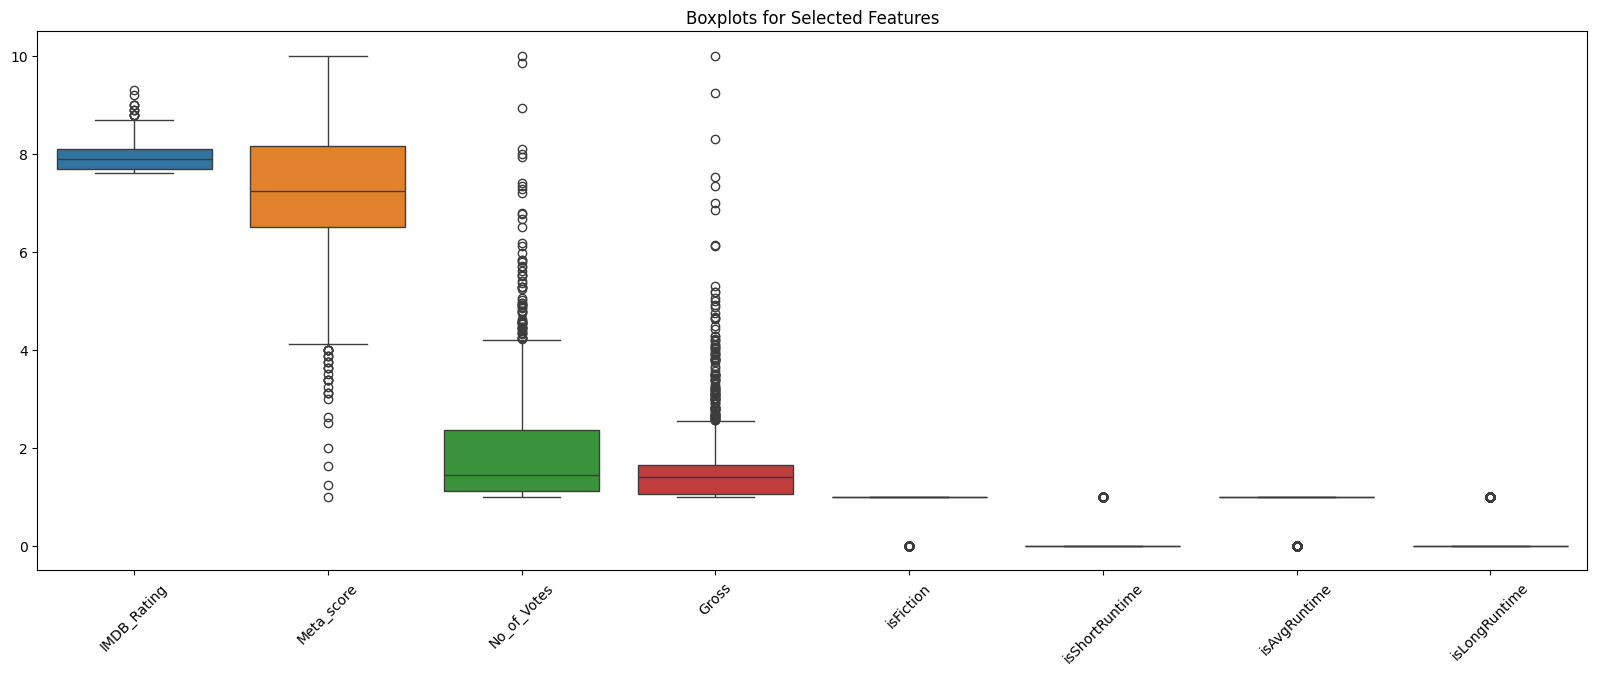

In [35]:
features_to_plot = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'isFiction', 'isShortRuntime', 'isAvgRuntime', 'isLongRuntime']

# Create a boxplot for each feature
plt.figure(figsize=(20, 7))
sns.boxplot(data=data[features_to_plot])
plt.xticks(rotation=45)
plt.title('Boxplots for Selected Features')
plt.show()

Range of the features looks alright and in understandable range with a good amount of outliers.

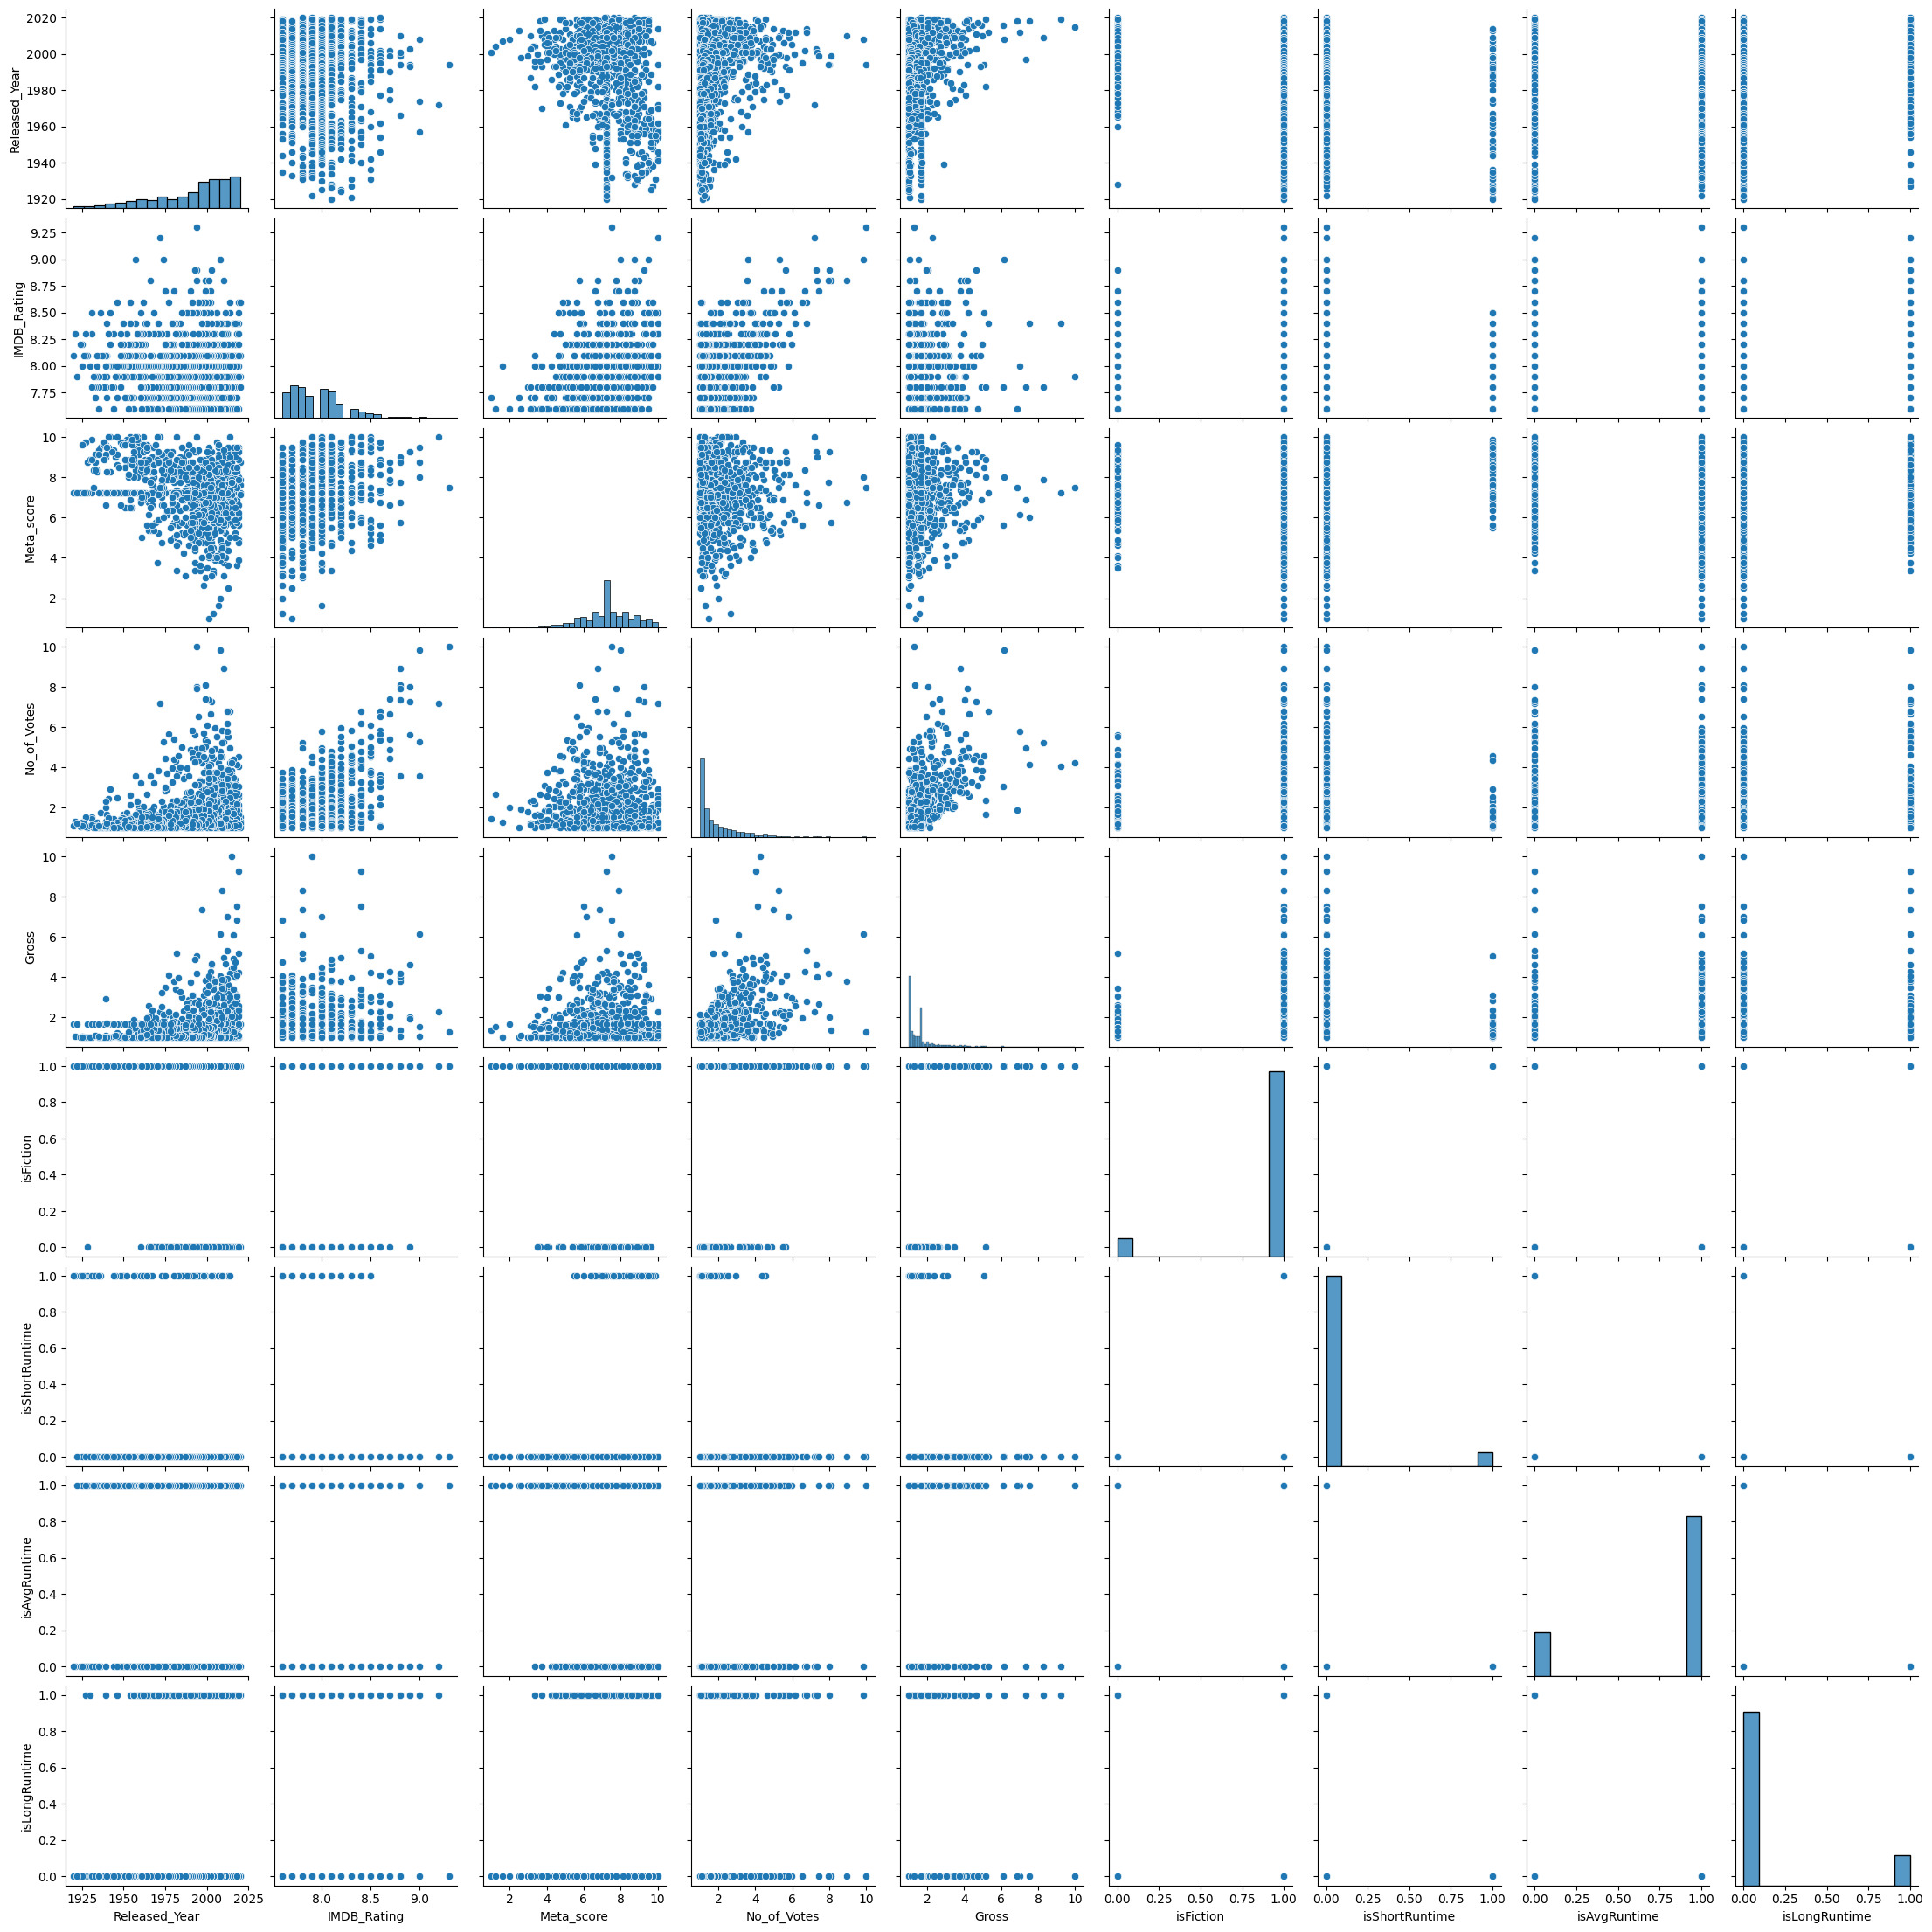

In [36]:
sns.pairplot(data)

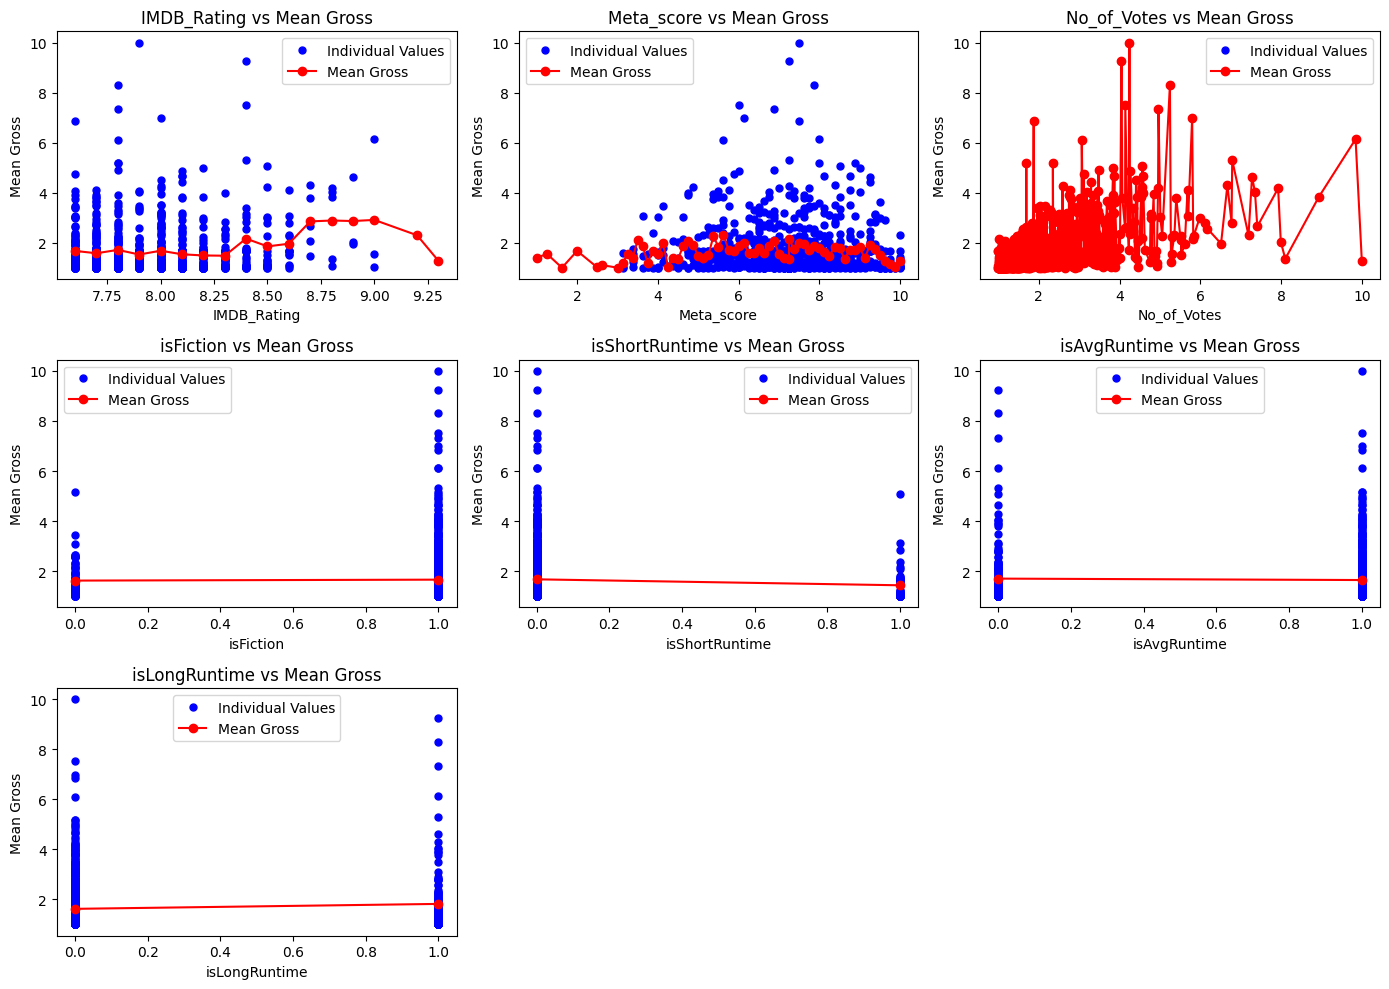

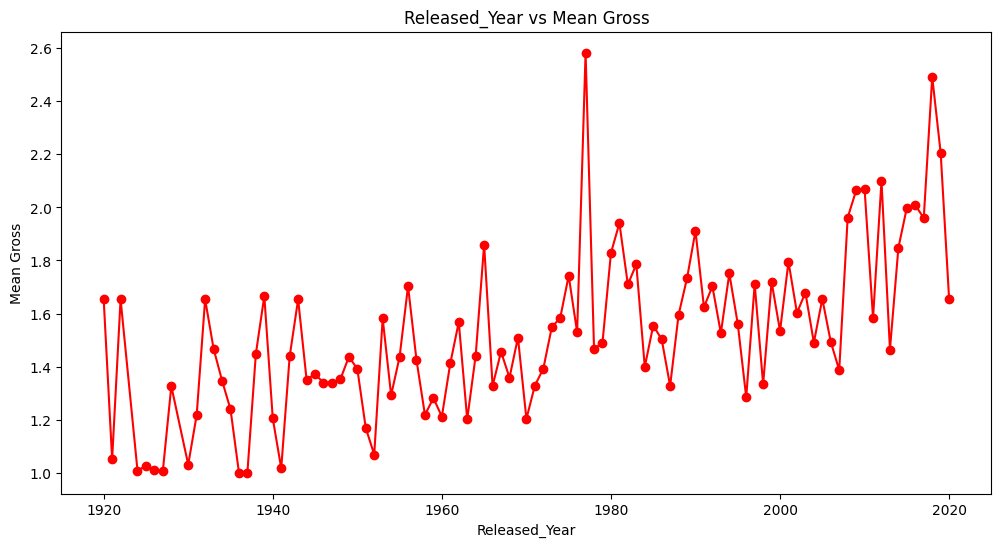

In [37]:

# Calculate the mean gross value for each Released_Year
mean_gross_by_year = data.groupby(['Released_Year']).agg({'Gross': 'mean'})

# Create line graphs for each feature with the mean of each value of that feature versus the mean gross value
features_to_plot = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'isFiction', 'isShortRuntime', 'isAvgRuntime', 'isLongRuntime']

plt.figure(figsize=(14, 10))

for feature in features_to_plot:
    plt.subplot(3, 3, features_to_plot.index(feature) + 1)
    plt.plot(data[feature], data['Gross'], marker='o', linestyle='', color='b', markersize=5, label='Individual Values')
    plt.plot(data.groupby([feature])['Gross'].mean(), marker='o', linestyle='-', color='r', label='Mean Gross')
    plt.title(f'{feature} vs Mean Gross')
    plt.xlabel(feature)
    plt.ylabel('Mean Gross')
    plt.legend()

plt.tight_layout()
plt.show()

# Create a line graph for Released_Year versus the mean gross value
plt.figure(figsize=(12, 6))
plt.plot(mean_gross_by_year.index, mean_gross_by_year['Gross'], marker='o', linestyle='-', color='r')
plt.title('Released_Year vs Mean Gross')
plt.xlabel('Released_Year')
plt.ylabel('Mean Gross')
plt.show()

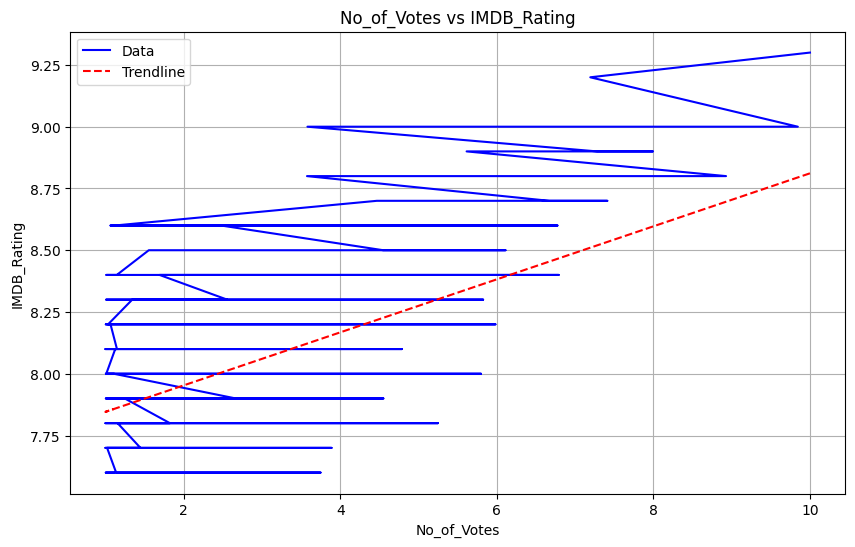

In [38]:
# Create a line graph between no of votes and imdb rating
from scipy.stats import linregress
# Calculate the trendline
slope, intercept, r_value, p_value, std_err = linregress(data['No_of_Votes'], data['IMDB_Rating'])
trendline = slope * data['No_of_Votes'] + intercept

# Create a line graph with trendline
plt.figure(figsize=(10, 6))
plt.plot(data['No_of_Votes'], data['IMDB_Rating'], linestyle='-', color='b', label='Data')
plt.plot(data['No_of_Votes'], trendline, linestyle='--', color='r', label='Trendline')
plt.title('No_of_Votes vs IMDB_Rating')
plt.xlabel('No_of_Votes')
plt.ylabel('IMDB_Rating')
plt.grid(True)
plt.legend()
plt.show()

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
  - I've used 3 methods, Heatmap, pairplots and a line graph to measure the highest collinearity features. The rest of the features have little to none correlation.
  - Only IMDB_rating and No_of_Votes happen to have to 0.49 ~.50 correlation value and the graph shown right above shows the trendline which proves that they have correlated.



5. Which independent variables have missing data? How much?

  - To Answer which Independent variables have missing data and how much,
   scroll up to where I saw where there was missing data.
  - I had 2 independent variables which had missing data, they were: Certificate and Meta_Score
  - Certificate had : 101 Missing values
  - Meta_Score had: 157 Missing values
  - My target variable had missing data as well, I used Mean replacement to fix those
  - The released_year feature had one wrong value at row 966, I fixed that with the right year when the movie had released





# Identifying Predictor Significance

In [39]:
import statsmodels.api as sm

# Add a constant term for the intercept
data = sm.add_constant(data)

# Define the dependent variable (target)
y = data['Gross']

# Define the independent variables (features)
X = data[['const', 'Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'isFiction', 'isShortRuntime', 'isAvgRuntime', 'isLongRuntime']]

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     76.73
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.54e-89
Time:                        05:02:43   Log-Likelihood:                -1162.5
No. Observations:                1000   AIC:                             2341.
Df Residuals:                     992   BIC:                             2380.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3420      2.045      2.



**List of Features and Their Significance:**

1. **Released_Year**:
   - P-Value: 0.759
   - Significance: Not statistically significant (p > 0.05).

2. **IMDB_Rating**:
   - P-Value: 0.000
   - Significance: Highly statistically significant (p < 0.05).

3. **Meta_score**:
   - P-Value: 0.075
   - Significance: Somewhat statistically significant (0.05 < p < 0.1).

4. **No_of_Votes**:
   - P-Value: 0.000
   - Significance: Highly statistically significant (p < 0.05).

5. **isFiction**:
   - P-Value: 0.513
   - Significance: Not statistically significant (p > 0.05).

6. **isShortRuntime**:
   - P-Value: 0.010
   - Significance: Statistically significant (p < 0.05).

7. **isAvgRuntime**:
   - P-Value: 0.012
   - Significance: Statistically significant (p < 0.05).

8. **isLongRuntime**:
   - P-Value: 0.007
   - Significance: Statistically significant (p < 0.05).

In summary, based on the p-values:

- **Highly Statistically Significant Features**: "IMDB_Rating" and "No_of_Votes."
- **Moderately Statistically Significant Features**: "Meta_score," "isShortRuntime," "isAvgRuntime," and "isLongRuntime."
- **Not Statistically Significant Features**: "Released_Year" and "isFiction."



# Building the Model

In [49]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Extract features (X) and target variable (y)
X = data[['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'isFiction', 'isShortRuntime', 'isAvgRuntime', 'isLongRuntime']]  # Features
y = data['Gross']  # Target variable

# Split the data into 80% training and 20% for validation/test (combined)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the 'temp' data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now, you have X_train, y_train (80% of the data for training),
# X_val, y_val (10% of the data for validation), and
# X_test, y_test (10% of the data for testing)

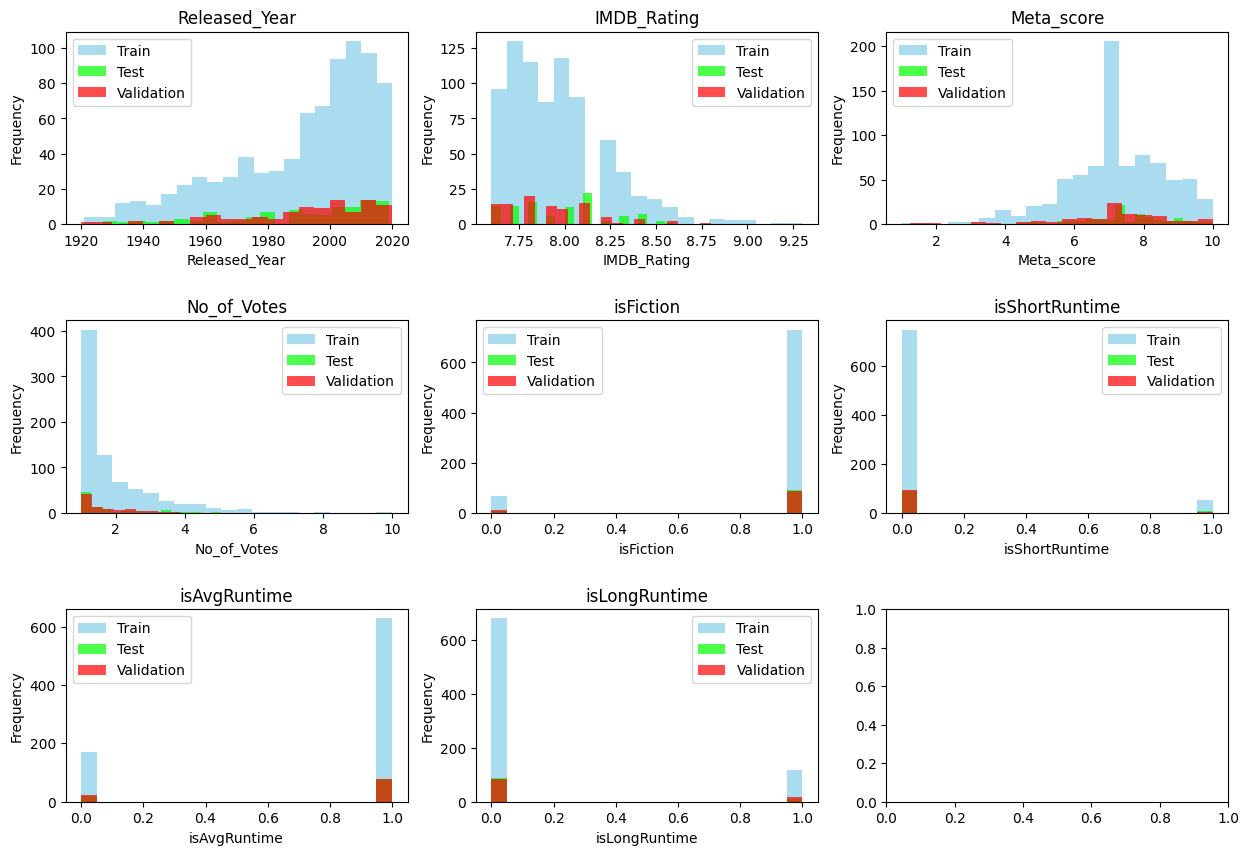

In [50]:

# Create subplots for histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Features to plot
features_to_plot = [
    "Released_Year",
    "IMDB_Rating",
    "Meta_score",
    "No_of_Votes",
    "isFiction",
    "isShortRuntime",
    "isAvgRuntime",
    "isLongRuntime",
]

# Plot histograms for each feature
for i, feature in enumerate(features_to_plot):
    row, col = divmod(i, 3)
    axes[row, col].hist(X_train[feature], bins=20, color='skyblue', alpha=0.7, label='Train')
    axes[row, col].hist(X_test[feature], bins=20, color='#00FF00', alpha=0.7, label='Test')
    axes[row, col].hist(X_val[feature], bins=20, color='#FF0000', alpha=0.7, label='Validation')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.show()

 Here is a summary of the distribution types for each feature based on the histograms:

Based on the histograms provided:

1. **Released Year**:
   - The distribution shows a general increase in the number of movies over time across all datasets, peaking in the most recent years. The shape is right-skewed, particularly pronounced in the Train dataset.

2. **IMDB Rating**:
   - The distribution is left-skewed with most movies having ratings around 8.0. The Train dataset shows a smoother distribution, whereas the Test and Validation datasets have more variability due to fewer samples.

3. **Meta_score**:
   - This distribution is multimodal with significant peaks, especially in the Test dataset around a score of 10, which could indicate a scoring ceiling or outliers. The Train dataset is more normally distributed around the median values.

4. **No_of_Votes**:
   - There is a long-tail, right-skewed distribution indicating that most movies have a smaller number of votes, with very few movies receiving a very large number of votes. This pattern is consistent across all datasets.

5. **isFiction**:
   - The distribution is highly imbalanced towards fiction across all datasets, with nearly all movies classified as fiction. The Validation dataset has a small number of non-fiction movies.

6. **isShortRuntime**:
   - The distribution is highly imbalanced towards movies that are not classified as having a short runtime across all datasets.

7. **isAvgRuntime**:
   - Similar to isShortRuntime, the distribution is highly imbalanced, with very few movies having what is considered an 'average' runtime in the datasets.

8. **isLongRuntime**:
   - The distribution is imbalanced, with most movies not classified as having a long runtime. There are a small number of long runtime movies in the Train and Validation datasets.

Comparing the splits, an 80-10-10 split has generally maintained the same distribution shapes across the Train, Test, and Validation sets, which is desirable for model training and evaluation as it suggests that the splits are representative of the same population. To determine which split is better, it is not just the shape of the distribution but also the consistency of representation across categories that matters.


# Linear Regression

In [51]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [52]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.56
Coefficient of determination: 0.35
R^2 score on tarining set = 0.3508425572400977


In [54]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.83
Coefficient of determination: 0.39
R^2 score on test set = 0.3852574735927733


In [55]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.74
Coefficient of determination: 0.28
R^2 score on validation set = 0.2798380401363594


# Feature Importance

In [57]:
# Understanding the important features
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=d0ab51e138547d6aba6742a75b817263caae9ecf30db447d9124079b783ab233
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


Weight,Feature
0.7280 ± 0.1038,No_of_Votes
0.0305 ± 0.0540,IMDB_Rating
0.0030 ± 0.0068,Released_Year
0.0027 ± 0.0038,isLongRuntime
0.0017 ± 0.0052,isAvgRuntime
0.0015 ± 0.0040,isFiction
0.0000 ± 0.0001,isShortRuntime
-0.0077 ± 0.0127,Meta_score


Interpretation of the top features based on the given output:

- "No_of_Votes" has the highest positive importance, with a mean weight of 0.7280. This suggests that the number of votes is the most important feature for predicting the target variable.

- "IMDB_Rating" also has a positive importance but with a smaller mean weight of 0.0305, indicating it contributes less to the prediction compared to "No_of_Votes."

- "Released_Year," "isLongRuntime," "isAvgRuntime," "isFiction," and "isShortRuntime" have relatively low importance scores, with means close to zero. They are less influential in predicting the target.

- "Meta_score" has a negative importance with a mean weight of -0.0077. This suggests that "Meta_score" has a slight negative impact on predicting the target, but its importance is not very significant.

# Outlier Removal and Testing

I'll use the Z-score method to find and remove outliers. So I will find the standard deviation first

In [61]:
# Assuming you have a DataFrame 'data' with your features
std_deviation = data.std()

# Display the standard deviation of each feature
print(std_deviation)

# Calculate the mean of each feature
mean_values = data.mean()

# Display the mean values
print(mean_values)

const              0.000000
Released_Year     23.285669
IMDB_Rating        0.275491
Meta_score         1.420258
No_of_Votes        1.271064
Gross              0.961216
isFiction          0.286325
isShortRuntime     0.251872
isAvgRuntime       0.411028
isLongRuntime      0.354283
dtype: float64
const                1.000000
Released_Year     1991.221000
IMDB_Rating          7.949300
Meta_score           7.246441
No_of_Votes          1.965239
Gross                1.653706
isFiction            0.910000
isShortRuntime       0.068000
isAvgRuntime         0.785000
isLongRuntime        0.147000
dtype: float64


Since No_of_Votes is the most significant feature, I'll remove outliers in that feature and try to predict.

In [64]:
from scipy import stats

# Calculate Z-scores for the 'No_of_Votes' column
z_scores = np.abs(stats.zscore(data['No_of_Votes']))

# Define a Z-score threshold (e.g., ±3)
z_threshold = 3

# Filter out rows with Z-scores beyond the threshold
data_no_outliers = data[(z_scores < z_threshold)]

# Display the data without outliers
data_no_outliers.head(30)

,const,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction,isShortRuntime,isAvgRuntime,isLongRuntime
3,1.0,1974,9.0,8.750000,5.289768,1.550560,1,0,0,1
4,1.0,1957,9.0,9.500000,3.580999,1.041881,1,0,1,0
7,1.0,1993,8.9,9.250000,5.614172,1.931049,0,0,0,1
12,1.0,1966,8.8,8.750000,3.575350,1.058600,1,0,0,1
15,1.0,1990,8.7,8.750000,4.865689,1.450020,0,0,1,0
16,1.0,1980,8.7,7.750000,5.403773,3.791046,1,0,1,0
17,1.0,1975,8.7,7.875000,4.467180,2.076151,1,0,1,0
18,1.0,2020,8.6,8.750000,1.117267,1.653706,0,0,0,1
19,1.0,2019,8.6,9.500000,3.048820,1.512778,1,0,1,0
20,1.0,2020,8.6,7.246441,1.116118,1.653706,1,0,0,1


In [65]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Extract features (X) and target variable (y) from data_no_outliers
X = data_no_outliers[['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'isFiction', 'isShortRuntime', 'isAvgRuntime', 'isLongRuntime']]  # Features
y = data_no_outliers['Gross']  # Target variable

# Split the data_no_outliers into 80% training and 20% for validation/test (combined)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the 'temp' data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Now, you have X_train, y_train (80% of the data for training),
# X_val, y_val (10% of the data for validation), and
# X_test, y_test (10% of the data for testing)

In [66]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

# Train the model using the training sets
regr1.fit(X_train, y_train)

LinearRegression()

In [67]:
# Make predictions using the training set
y_pred = regr1.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.51
Coefficient of determination: 0.37
R^2 score on tarining set = 0.36887677168034494


In [68]:
# Make predictions using the testing set
y_pred = regr1.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.78
Coefficient of determination: 0.10
R^2 score on test set = 0.0962121230221189


In [70]:
# Make predictions using the validation set
y_pred = regr1.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.75
Coefficient of determination: 0.27
R^2 score on validation set = 0.2659078984297917


After removing outliers on No of Votes, there is a difference. Since my main aim is to increase prediction accuracy, the decrease in my MSE is good thing. Since my features are not very dependent on each other, and that no of votes has collinearity with IMDB rating, removing outliers for both may have increased my coefficient of determination. But in this case, the Coeff, Increased.



# Removing 1%, 5%, 10% of my data, using 3 different Imputation methods to test my model's results.

In [71]:
data.head()

,const,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,isFiction,isShortRuntime,isAvgRuntime,isLongRuntime
0,1.0,1994,9.3,7.50,10.000000,1.272309,1,0,1,0
1,1.0,1972,9.2,10.00,7.193863,2.296826,1,0,0,1
2,1.0,2008,9.0,8.00,9.845169,6.139228,1,0,0,1
3,1.0,1974,9.0,8.75,5.289768,1.550560,1,0,0,1
4,1.0,1957,9.0,9.50,3.580999,1.041881,1,0,1,0


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is defined somewhere in the code above as your DataFrame
# Define the categorical and numeric columns
categorical_columns = ['isFiction', 'isShortRuntime', 'isAvgRuntime', 'isLongRuntime']
numeric_columns = [col for col in data.columns if col not in categorical_columns]

# Create a copy of the original data
data_copy = data.copy()

# Define the percentage of data to remove (1%, 5%, 10%)
percentages_to_remove = [0.01, 0.05, 0.10]

for percentage in percentages_to_remove:
    print(f'Now working with {percentage*100} % removal of data ')
    # Randomly select rows to remove
    num_rows_to_remove = int(len(data_copy) * percentage)
    removed_indices = np.random.choice(data_copy.index, num_rows_to_remove, replace=False)

    # Create a version of the data with missing values
    data_with_missing = data_copy.copy()
    data_with_missing.loc[removed_indices, numeric_columns] = np.nan

    # Perform imputation using multiple methods
    imputation_methods = ['mean', 'iterative', 'knn']
    for method in imputation_methods:
        if method == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif method == 'iterative':
            imputer = IterativeImputer(max_iter=10, random_state=0)
        elif method == 'knn':
            imputer = KNNImputer(n_neighbors=2)

        # Impute missing values for numeric columns
        data_imputed_numeric = imputer.fit_transform(data_with_missing[numeric_columns])

        # Create DataFrames from imputed arrays for numeric columns
        data_imputed_df_numeric = pd.DataFrame(data_imputed_numeric, columns=numeric_columns, index=data_with_missing.index)

        # Merge imputed numeric and original categorical data
        data_imputed = pd.concat([data_with_missing[categorical_columns], data_imputed_df_numeric], axis=1)

        # Evaluate imputation quality for numeric columns
        for col in numeric_columns:
            # For numeric columns, calculate % error on residuals
            original_values = data_copy.loc[removed_indices, col]
            imputed_values = data_imputed.loc[removed_indices, col]
            mask = ~np.isnan(original_values)
            error = np.abs(original_values[mask] - imputed_values[mask]) / original_values[mask]
            mean_percent_error = error.mean() * 100
            print(f'{method} imputation for {col}: Mean % Error on Residuals = {mean_percent_error:.2f}%')

        # Evaluate imputation quality for categorical columns
        for col in categorical_columns:
            # Impute missing values for categorical columns using the most frequent value
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            data_with_missing[col] = categorical_imputer.fit_transform(data_with_missing[[col]])

            # For categorical columns, calculate accuracy and confusion matrix
            le = LabelEncoder()
            original_values = le.fit_transform(data_copy.loc[removed_indices, col].astype(str))
            imputed_values = le.transform(data_with_missing.loc[removed_indices, col].astype(str))

            accuracy = accuracy_score(original_values, imputed_values)
            confusion = confusion_matrix(original_values, imputed_values)
            print(f'{method} imputation for {col}: Accuracy = {accuracy:.2f}')
            print(f'Confusion Matrix:\n{confusion}\n')


Now working with 1.0 % removal of data 
mean imputation for const: Mean % Error on Residuals = 0.00%
mean imputation for Released_Year: Mean % Error on Residuals = 1.16%
mean imputation for IMDB_Rating: Mean % Error on Residuals = 2.66%
mean imputation for Meta_score: Mean % Error on Residuals = 24.80%
mean imputation for No_of_Votes: Mean % Error on Residuals = 42.87%
mean imputation for Gross: Mean % Error on Residuals = 31.40%
mean imputation for isFiction: Accuracy = 1.00
Confusion Matrix:
[[10]]

mean imputation for isShortRuntime: Accuracy = 1.00
Confusion Matrix:
[[10]]

mean imputation for isAvgRuntime: Accuracy = 1.00
Confusion Matrix:
[[2 0]
 [0 8]]

mean imputation for isLongRuntime: Accuracy = 1.00
Confusion Matrix:
[[8 0]
 [0 2]]

iterative imputation for const: Mean % Error on Residuals = 0.00%
iterative imputation for Released_Year: Mean % Error on Residuals = 1.16%
iterative imputation for IMDB_Rating: Mean % Error on Residuals = 2.66%
iterative imputation for Meta_scor

# Answering Questions:


1. What are the data types? (Only numeric and categorical)
  -  **Poster_Link:** Categorical data (text/URL representing the poster link).
  - **Series_Title:** Categorical data (text representing the title of the series/movie).
  - **Released_Year:** Numeric data (representing the release year).
  - **Certificate:** Categorical data (text representing the certification).
  - **Runtime:** Categorical data (text representing the duration).
  - **Genre:** Categorical data (text representing the genre).
  - **IMDB_Rating:** Numeric data (representing the IMDb rating).
  - **Overview:** Categorical data (text providing a brief overview or description).
  - **Meta_score:** Numeric data (representing the metascore).
  - **Director:** Categorical data (text representing the director's name).
  - **Star1, Star2, Star3, Star4:** Categorical data (text representing the names of stars).
  - **No_of_Votes:** Numeric data (representing the number of votes).
  - **Gross:** Numeric data (representing the gross earnings).


2. Are there missing values?
  - Yes, there are missing values in Gross, certificate and Meta_Score columns

3. What are the likely distributions of the numeric variables?
  -  **IMDB rating:** The graph indicates right-skewed data.
  - **Meta_Score:** The distribution appears to be normal.
  - **No_Of_Votes:** The graph suggests right-skewed data.
  - **Gross:** The distribution of Gross appears to be right-skewed.

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

  - I've used 3 methods, Heatmap, pairplots and a line graph to measure the highest collinearity features. The rest of the features have little to none correlation.




5. Which independent variables have missing data? How much?

  - To Answer which Independent variables have missing data and how much,
   scroll up to where I saw where there was missing data.
  - I had 2 independent variables which had missing data, they were: Certificate and Meta_Score
  - Certificate had : 101 Missing values
  - Meta_Score had: 157 Missing values
  - My target variable had missing data as well, I used Mean replacement to fix those
  - The released_year feature had one wrong value at row 966, I fixed that with the right year when the movie had released


6. Do the training and test sets have the same data?
  - No, I've used a 80, 10, 10 split of Training, Test, Validation split.

7. In the predictor variables independent of all the other predictor variables?
   - Only IMDB_rating and No_of_Votes happen to have to 0.49 ~.50 correlation value and the graph shown above shows the trendline which proves that they have correlated.

8. Which predictor variables are the most important?

- Based on the OLS method for predictor significance,
    - **Released_Year**:
      - P-Value: 0.759
      - Significance: Not statistically significant (p > 0.05).

    - **IMDB_Rating**:
      - P-Value: 0.000
      - Significance: Highly statistically significant (p < 0.05).

    - **Meta_score**:
      - P-Value: 0.075
      - Significance: Somewhat statistically significant (0.05 < p < 0.1).

    - **No_of_Votes**:
      - P-Value: 0.000
      - Significance: Highly statistically significant (p < 0.05).

    - **isFiction**:
      - P-Value: 0.513
      - Significance: Not statistically significant (p > 0.05).

    - **isShortRuntime**:
      - P-Value: 0.010
      - Significance: Statistically significant (p < 0.05).

    - **isAvgRuntime**:
      - P-Value: 0.012
      - Significance: Statistically significant (p < 0.05).

    - **isLongRuntime**:
      - P-Value: 0.007
      - Significance: Statistically significant (p < 0.05).

  - In summary, based on the p-values:

    - **Highly Statistically Significant Features**: "IMDB_Rating" and "No_of_Votes."
    - **Moderately Statistically Significant Features**: "Meta_score," "isShortRuntime," "isAvgRuntime," and "isLongRuntime."
    - **Not Statistically Significant Features**: "Released_Year" and "isFiction."

- Based on Permutation Importance for features:

  - "No_of_Votes" has the highest positive importance, with a mean weight of 0.7280. This suggests that the number of votes is the most important feature for predicting the target variable.

  - "IMDB_Rating" also has a positive importance but with a smaller mean weight of 0.0305, indicating it contributes less to the prediction compared to "No_of_Votes."

  - "Released_Year," "isLongRuntime," "isAvgRuntime," "isFiction," and "isShortRuntime" have relatively low importance scores, with means close to zero. They are less influential in predicting the target.

  - "Meta_score" has a negative importance with a mean weight of -0.0077. This suggests that "Meta_score" has a slight negative impact on predicting the target, but its importance is not very significant.

9. Do the ranges of the predictor variables make sense?
  - The ranges did not make sense at the start, so I normalized the values to be set between 1 - 10 to  match the imdb rating range. But I did not touch the year column as year cannot be normalized without changing the values.

10. What are the distributions of the predictor variables?   
 - Here is a summary of the distribution types for each feature based on the histograms:

- Based on the histograms provided above:

  - **Released Year**:
    - The distribution shows a general increase in the number of movies over time across all datasets, peaking in the most recent years. The shape is right-skewed, particularly pronounced in the Train dataset.

  - **IMDB Rating**:
    - The distribution is left-skewed with most movies having ratings around 8.0. The Train dataset shows a smoother distribution, whereas the Test and Validation datasets have more variability due to fewer samples.

  - **Meta_score**:
    - This distribution is multimodal with significant peaks, especially in the Test dataset around a score of 10, which could indicate a scoring ceiling or outliers. The Train dataset is more normally distributed around the median values.

  - **No_of_Votes**:
    - There is a long-tail, right-skewed distribution indicating that most movies have a smaller number of votes, with very few movies receiving a very large number of votes. This pattern is consistent across all datasets.

  - **isFiction**:
    - The distribution is highly imbalanced towards fiction across all datasets, with nearly all movies classified as fiction. The Validation dataset has a small number of non-fiction movies.

  - **isShortRuntime**:
    - The distribution is highly imbalanced towards movies that are not classified as having a short runtime across all datasets.

  - **isAvgRuntime**:
    - Similar to isShortRuntime, the distribution is highly imbalanced, with very few movies having what is considered an 'average' runtime in the datasets.

  - **isLongRuntime**:
    - The distribution is imbalanced, with most movies not classified as having a long runtime. There are a small number of long runtime movies in the Train and Validation datasets.




11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

- After removing outliers on No of Votes, there is a difference. Since my main aim is to increase prediction accuracy, the decrease in my MSE is good thing. Since my features are not very dependent on each other, and that no of votes has collinearity with IMDB rating, removing outliers for both may have increased my coefficient of determination. But in this case, the Coeff, Increased.
- I removed outliers on no_of_votes because it was the feature with the highest significance based on the permutation importance calculation that I peformed.

12.  Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals
  - For numeric data and check for bias and variance of the error.
  - For categorical data, calculate the accuracy and a confusion matrix.


- Code and Completed results are present above.
- Summary is that the Imputation methods are not very good for Numeric values, in a way that the error calculated after imputation methods, regardless of the type of imputation and amount of imputation, is really high for Gross and No_of_votes, which according the models so far are the best related.
- Summary for Categorical variables is that, the accuracy is always 1 and confusion matrix has no false positives or falso negatives. So the imputation methods works well with categorical values.

# Conclusion

There is multicollinearity between IMDB_rating and no_of_votes but no_of_votes has the highest significance amongst the predictor variables. Although IMDB rating also has a postive signifiance, there is a drastic difference between the top 2 features.


# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
5.https://www.kaggle.com/code/abdulrahmankhaled1/top-1000-imdb-movie-eda
6. https://www.kaggle.com/code/sujanganeshkumar/movie-gross-revenue-prediction-project/notebook
7. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
8.  https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#
9. https://encord.com/blog/train-val-test-split/#:~:text=The%20training%20set%20data%20must,10%2D20%25%20test%20data.
10. ChatGPT

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently and with help of chatGPT . Feature importance reference is taken from eli5 offical documnetation

# Licensing

MIT License

Copyright (c) 2024 KaushikMreddy

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.